In [2]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

In [29]:
class dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('/')[-1].split('.')[1]
        if label == 'brown_bears':
            label=0
        elif label == 'polar_bears':
            label=1
        #print(label)  
            
        return img_transformed,label

In [30]:
images_list = []
images_list = glob.glob(os.path.join('dataset/dataset_random_name','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

In [31]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

2085
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
1668
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
208
['dataset/dataset_random_name\\08065.polar_bears.jpg', 'dataset/dataset_random_name\\08070.brown_bears.jpg', 'dataset/dataset_random_name\\08071.polar_bears.jpg', 'dataset/dataset_random_name\\08080.brown_bears.jpg', 'dataset/dataset_random_name\\08084.brown_bears.jpg']
209
['dataset/dataset_random_name\\09081.polar_bears.jpg', 'dataset/dataset_random_name\\09083.brown_bears.jpg', 'dataset/dataset_random_name\\09084.brown_bears.jpg', 'datas

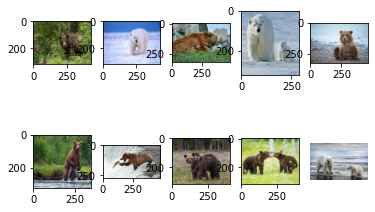

In [33]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

In [34]:
print(train_list[0].split('/')[1].split('.')[1])

polar_bears


In [35]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

In [36]:
print(train_data[1])

(tensor([[[0.1137, 0.1176, 0.1294,  ..., 0.1255, 0.1333, 0.1216],
         [0.1137, 0.1176, 0.1255,  ..., 0.1373, 0.1373, 0.1373],
         [0.1137, 0.1176, 0.1255,  ..., 0.1490, 0.1451, 0.1608],
         ...,
         [0.0784, 0.0784, 0.0784,  ..., 0.2078, 0.2078, 0.2235],
         [0.0745, 0.0706, 0.0667,  ..., 0.2078, 0.2235, 0.2588],
         [0.0706, 0.0667, 0.0627,  ..., 0.2471, 0.2745, 0.3098]],

        [[0.2235, 0.2235, 0.2235,  ..., 0.1216, 0.1294, 0.1176],
         [0.2235, 0.2235, 0.2196,  ..., 0.1373, 0.1333, 0.1333],
         [0.2235, 0.2235, 0.2196,  ..., 0.1490, 0.1412, 0.1569],
         ...,
         [0.1490, 0.1490, 0.1529,  ..., 0.1608, 0.1608, 0.1765],
         [0.1608, 0.1569, 0.1608,  ..., 0.1569, 0.1725, 0.2078],
         [0.1647, 0.1608, 0.1608,  ..., 0.1922, 0.2196, 0.2549]],

        [[0.3412, 0.3373, 0.3412,  ..., 0.1451, 0.1529, 0.1451],
         [0.3412, 0.3373, 0.3373,  ..., 0.1569, 0.1569, 0.1569],
         [0.3412, 0.3333, 0.3333,  ..., 0.1686, 0.1647, 0

In [37]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method
epochs = 10 # How much to train a model

In [38]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size=batch_size, 
                                          shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, 
                                         batch_size=batch_size, 
                                         shuffle=True)

In [57]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1668 17


TypeError: 'DataLoader' object is not subscriptable

In [40]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [41]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)
model.train()

Cnn(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (re

In [42]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [43]:
epochs = 10

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    
    for data, label in train_loader:
        data = data.to(device)
        label = label.to(device)
        
        output = model(data)
        loss = criterion(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = ((output.argmax(dim=1) == label).float().mean())
        epoch_accuracy += acc/len(train_loader)
        epoch_loss += loss/len(train_loader)
        
    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
    
    accuracy_values.append(epoch_accuracy.item())
    loss_values.append(epoch_loss.item())
    
    with torch.no_grad():
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = criterion(val_output,label)
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        val_accuracy_values.append(epoch_val_accuracy.item())
        val_loss_values.append(epoch_val_loss.item())
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))

Epoch : 1, train accuracy : 0.816885769367218, train loss : 0.36777207255363464
Epoch : 1, val_accuracy : 0.9162963032722473, val_loss : 0.20878149569034576
Epoch : 2, train accuracy : 0.9274393916130066, train loss : 0.18562954664230347
Epoch : 2, val_accuracy : 0.9129629731178284, val_loss : 0.2370029091835022
Epoch : 3, train accuracy : 0.9316262602806091, train loss : 0.18037603795528412
Epoch : 3, val_accuracy : 0.8492592573165894, val_loss : 0.39855560660362244
Epoch : 4, train accuracy : 0.9215916991233826, train loss : 0.19424615800380707
Epoch : 4, val_accuracy : 0.8792592287063599, val_loss : 0.29490914940834045
Epoch : 5, train accuracy : 0.9470933675765991, train loss : 0.14178407192230225
Epoch : 5, val_accuracy : 0.7818518877029419, val_loss : 0.4809836745262146
Epoch : 6, train accuracy : 0.9427334666252136, train loss : 0.15283800661563873
Epoch : 6, val_accuracy : 0.9229629635810852, val_loss : 0.16630014777183533
Epoch : 7, train accuracy : 0.9527334570884705, train l

[0.816885769367218, 0.9274393916130066, 0.9316262602806091, 0.9215916991233826, 0.9470933675765991, 0.9427334666252136, 0.9527334570884705, 0.9482352137565613, 0.9492040276527405, 0.9565051198005676]
------------------------------
[0.36777207255363464, 0.18562954664230347, 0.18037603795528412, 0.19424615800380707, 0.14178407192230225, 0.15283800661563873, 0.13714784383773804, 0.1360855996608734, 0.13907192647457123, 0.12125086784362793]


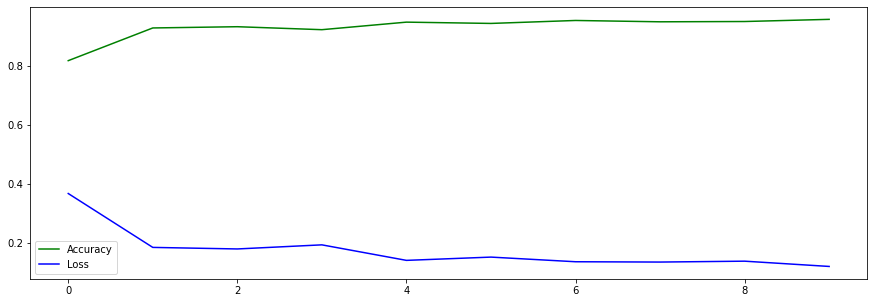

In [44]:
print(accuracy_values)
print('------------------------------')
print(loss_values)
plt.figure(figsize=(15, 5))
plt.plot(range(10), accuracy_values, color="green")
plt.plot(range(10),loss_values, color="blue")
plt.legend(["Accuracy", "Loss"])

[0.9162963032722473, 0.9129629731178284, 0.8492592573165894, 0.8792592287063599, 0.7818518877029419, 0.9229629635810852, 0.872592568397522, 0.9462962746620178, 0.9833333492279053, 0.9396296143531799]
------------------------------
[0.20878149569034576, 0.2370029091835022, 0.39855560660362244, 0.29490914940834045, 0.4809836745262146, 0.16630014777183533, 0.21887394785881042, 0.11669563502073288, 0.08901853859424591, 0.1352832317352295]


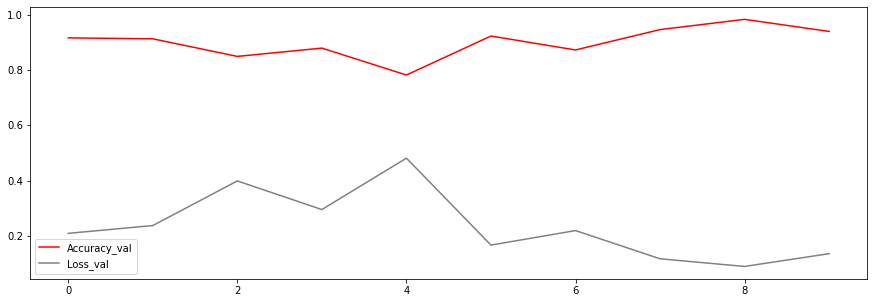

In [45]:
print(val_accuracy_values)
print('------------------------------')
print(val_loss_values)
plt.figure(figsize=(15, 5))
plt.plot(range(10), val_accuracy_values, color="red")
plt.plot(range(10),val_loss_values, color="gray")
plt.legend(["Accuracy_val", "Loss_val"])

In [62]:
bears_probs = []
model.eval()
with torch.no_grad():
    for data, fileid in test_loader:
        data = data.to(device)
        preds = model(data)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        print(fileid)
        bears_probs += list(zip(fileid, preds_list))

tensor([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1])
tensor([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0])
tensor([0, 1, 1, 1, 1, 0, 0, 1])


In [47]:
bears_probs.sort(key = lambda x : int(x[0]))
print(bears_probs)

[(tensor(0), 0.0012441332219168544), (tensor(0), 0.00021016586106270552), (tensor(0), 0.007571513298898935), (tensor(0), 0.0003139269829262048), (tensor(0), 0.2892865240573883), (tensor(0), 0.00021228777768556029), (tensor(0), 0.011836165562272072), (tensor(0), 0.004769402090460062), (tensor(0), 0.0003649553400464356), (tensor(0), 0.004096540622413158), (tensor(0), 0.0244520902633667), (tensor(0), 0.0011086846934631467), (tensor(0), 0.0075091952458024025), (tensor(0), 0.003332583699375391), (tensor(0), 0.00101244798861444), (tensor(0), 0.3471943438053131), (tensor(0), 0.0015418115071952343), (tensor(0), 4.145564162172377e-05), (tensor(0), 3.914161084139778e-07), (tensor(0), 8.832304592942819e-05), (tensor(0), 0.49939191341400146), (tensor(0), 0.0012272314634174109), (tensor(0), 0.44154924154281616), (tensor(0), 0.02303299307823181), (tensor(0), 0.0015777293592691422), (tensor(0), 0.005783971399068832), (tensor(0), 2.4423117793048732e-05), (tensor(0), 0.0018659160705283284), (tensor(0),

In [54]:
idx = list(map(lambda x: x[0],bears_probs))
print(idx)
prob = list(map(lambda x: x[1],bears_probs))
print(prob)

[tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)

In [55]:
submission = pd.DataFrame({'id':idx,'label':prob})
print(submission)

            id     label
0    tensor(0)  0.001244
1    tensor(0)  0.000210
2    tensor(0)  0.007572
3    tensor(0)  0.000314
4    tensor(0)  0.289287
..         ...       ...
203  tensor(1)  0.021082
204  tensor(1)  0.968049
205  tensor(1)  0.924768
206  tensor(1)  0.939273
207  tensor(1)  0.973942

[208 rows x 2 columns]


In [50]:
submission

,id,label
0,tensor(0),0.001244
1,tensor(0),0.000210
2,tensor(0),0.007572
3,tensor(0),0.000314
4,tensor(0),0.289287
...,...,...
203,tensor(1),0.021082
204,tensor(1),0.968049
205,tensor(1),0.924768
206,tensor(1),0.939273


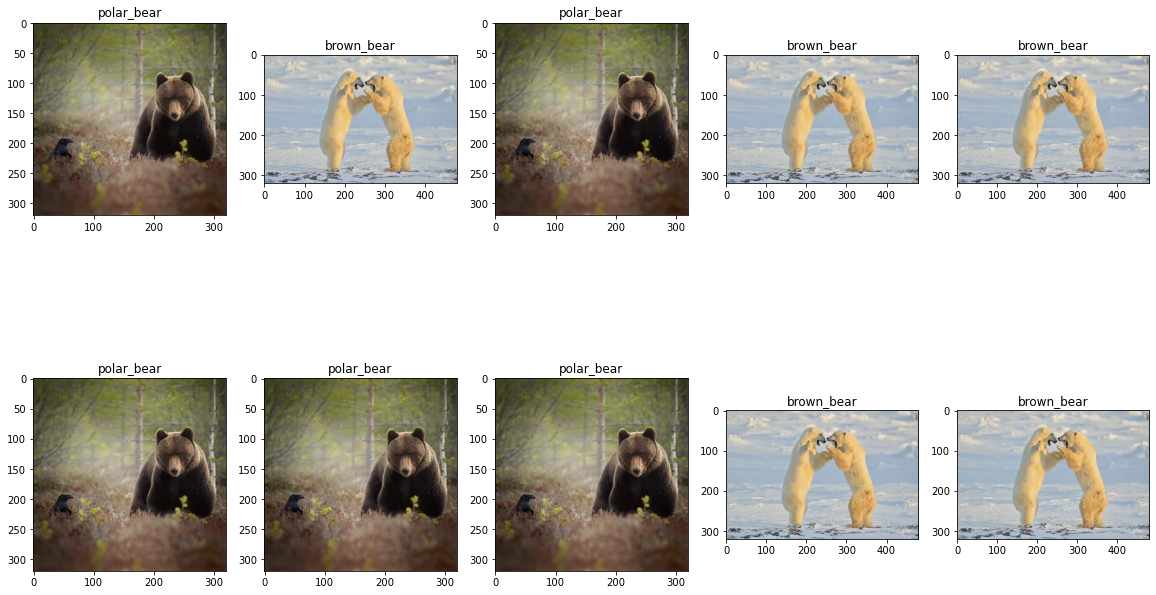

In [67]:
import random

id_list = []
class_ = {0: 'brown_bear', 1: 'polar_bear'}

fig, axes = plt.subplots(2, 5, figsize=(20, 12), facecolor='w')

for ax in axes.ravel():
    
    i = random.choice(submission['id'].values)
    
    label = submission.loc[submission['id'] == i, 'label'].values[0]
    if label > 0.5:
        label = 1
    else:
        label = 0
        
    img_path = test_list[i]
    img = Image.open(img_path)
    
    ax.set_title(class_[label])
    ax.imshow(img)